In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
# Importing the dataset
dataset = pd.read_csv('../data/output_data.csv', usecols=['Word', 'letter occupancy', 'frequency', 'class', 'difficult'], index_col='Word')

In [27]:
dataset.head()

,letter occupancy,frequency,class,difficult
Word,,,,
slump,0.523169,0.004210,0.857143,0.396303
crank,0.688590,0.002907,1.000000,0.391586
gorge,0.692576,0.001674,0.857143,0.378253
query,0.515197,0.002145,0.428571,0.358201
drink,0.546587,0.045307,0.000000,0.308113


In [28]:
from sklearn.cluster import KMeans
# 设置为三个聚类中心
Kmeans = KMeans(n_clusters=5, n_init=10)
# 训练模型
Kmeans.fit(dataset)

KMeans(n_clusters=5, n_init=10)

In [29]:
# 获取聚类中心
centers = Kmeans.cluster_centers_

In [30]:
# 获取聚类标签
labels = Kmeans.labels_
labels
# 将标签添加到数据集中
dataset['label'] = labels

In [31]:
dataset

,letter occupancy,frequency,class,difficult,label
Word,,,,,
slump,0.523169,0.004210,0.857143,0.396303,1
crank,0.688590,0.002907,1.000000,0.391586,4
gorge,0.692576,0.001674,0.857143,0.378253,4
query,0.515197,0.002145,0.428571,0.358201,3
drink,0.546587,0.045307,0.000000,0.308113,0
...,...,...,...,...,...
condo,0.455904,0.002540,1.000000,0.417033,1
impel,0.264076,0.000458,1.000000,0.438315,1
havoc,0.286996,0.001422,0.857143,0.422543,1


In [32]:
# 统计各个类别的数量
pd.Series(labels).value_counts()


4    122
1    112
2     49
3     44
0     32
dtype: int64

C:\Program1\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


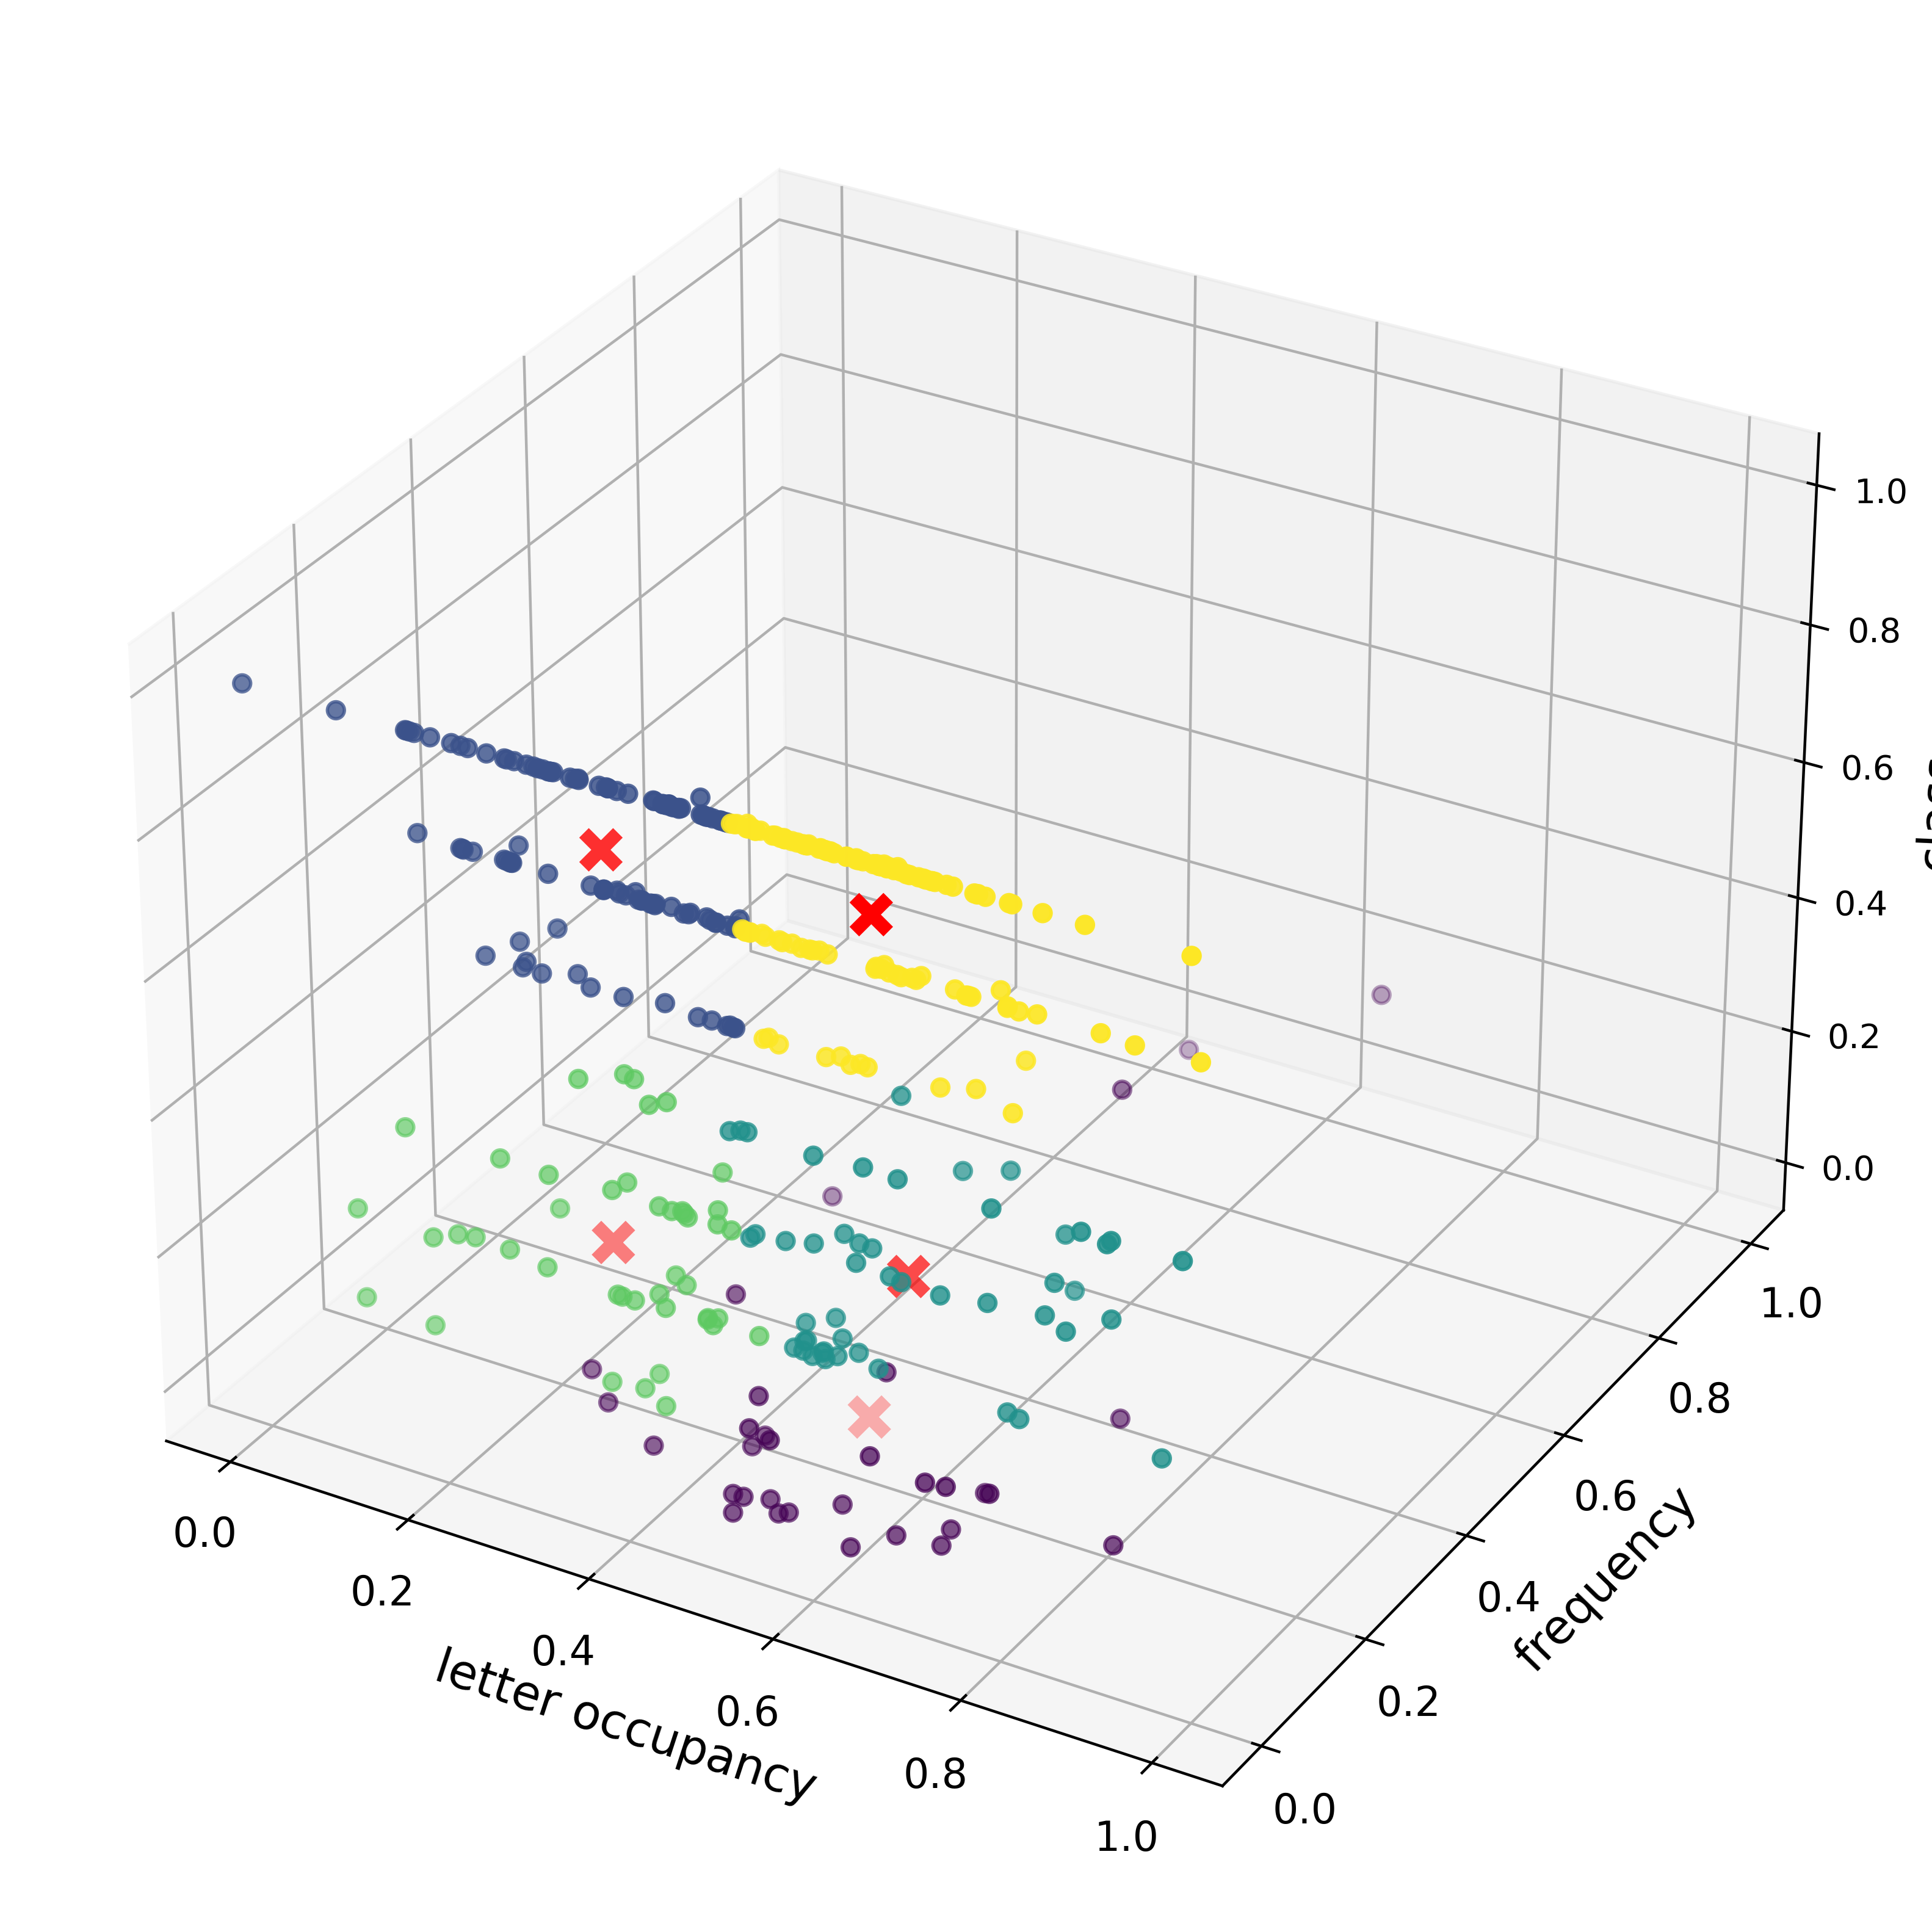

In [33]:
# 画出三维点图，使得每个点的颜色与其所属的类别相同
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['letter occupancy'], dataset['frequency'], dataset['class'], c=labels, s=25)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='r', marker='x', s=100, linewidths=4)
# 标出聚类中心的坐标
# for i in range(5):
#     ax.text(centers[i, 0], centers[i, 1], centers[i, 2], str(i), color='k', fontsize=10)

ax.set_xlabel('letter occupancy', fontsize=14)
ax.set_ylabel('frequency', fontsize=14)
ax.set_zlabel('class', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
# 设置可旋转
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 400

fig.savefig('../pic/cluster.png')

In [35]:
dataset.to_csv('../data/output_data.csv')